In [82]:
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q pandas
!pip install -q sympy

In [ ]:
dictData = {
    "StreamNo":[1,2,3,4,5],
    "Type":['hot', 'hot', 'cold', 'hot', 'cold'],
    "CP":[3.0,1.0,2.0,1.5,4],
    "Ts":[180,280,30,190,60],
    "Tt":[60,110,260,130,260],
}

dictData

{'StreamNo': [1, 2, 3, 4, 5],
 'Type': ['hot', 'hot', 'cold', 'hot', 'cold'],
 'CP': [3.0, 1.0, 2.0, 1.5, 4],
 'Ts': [180, 280, 30, 190, 60],
 'Tt': [60, 110, 260, 130, 260]}

In [ ]:
import pandas as pd

df = pd.DataFrame(dictData)
df

,StreamNo,Type,CP,Ts,Tt
0,1,hot,3.0,180,60
1,2,hot,1.0,280,110
2,3,cold,2.0,30,260
3,4,hot,1.5,190,130
4,5,cold,4.0,60,260


In [ ]:
df['dH'] = (df['CP'] * (df['Ts'] - df['Tt'])).abs()
df['Hs'] = (df['CP'] * df['Ts']).abs()
df['Ht'] = (df['CP'] * df['Tt']).abs()
df

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,hot,3.0,180,60,360.0,540.0,180.0
1,2,hot,1.0,280,110,170.0,280.0,110.0
2,3,cold,2.0,30,260,460.0,60.0,520.0
3,4,hot,1.5,190,130,90.0,285.0,195.0
4,5,cold,4.0,60,260,800.0,240.0,1040.0


In [ ]:
dTmin = 5;
iT = dTmin/2;

(dTmin, iT)

(10, 5.0)

In [ ]:
dfHot = df[df['Type']=='hot']
dfHot

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,hot,3.0,180,60,360.0,540.0,180.0
1,2,hot,1.0,280,110,170.0,280.0,110.0
3,4,hot,1.5,190,130,90.0,285.0,195.0


In [ ]:
yh = dfHot[['Ts','Tt']] - iT
yh

,Ts,Tt
0,175.0,55.0
1,275.0,105.0
3,185.0,125.0


In [ ]:
dfCold = df[df['Type']=='cold']
dfCold

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
2,3,cold,2.0,30,260,460.0,60.0,520.0
4,5,cold,4.0,60,260,800.0,240.0,1040.0


In [ ]:
yc = dfCold[['Ts','Tt']] + iT
yc

,Ts,Tt
2,35.0,265.0
4,65.0,265.0


In [ ]:
dfHC = pd.concat([yh, yc])
dfHC

,Ts,Tt
0,175.0,55.0
1,275.0,105.0
3,185.0,125.0
2,35.0,265.0
4,65.0,265.0


In [ ]:
df[['iTs','iTt']] = dfHC
df

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht,iTs,iTt
0,1,hot,3.0,180,60,360.0,540.0,180.0,175.0,55.0
1,2,hot,1.0,280,110,170.0,280.0,110.0,275.0,105.0
2,3,cold,2.0,30,260,460.0,60.0,520.0,35.0,265.0
3,4,hot,1.5,190,130,90.0,285.0,195.0,185.0,125.0
4,5,cold,4.0,60,260,800.0,240.0,1040.0,65.0,265.0


In [ ]:
dfHot

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,hot,3.0,180,60,360.0,540.0,180.0
1,2,hot,1.0,280,110,170.0,280.0,110.0
3,4,hot,1.5,190,130,90.0,285.0,195.0


In [ ]:
dfs = df[['StreamNo','Type','CP','iTs']]
dfs.columns = ['StreamNo','Type','CP','iT']
dfs

,StreamNo,Type,CP,iT
0,1,hot,3.0,175.0
1,2,hot,1.0,275.0
2,3,cold,2.0,35.0
3,4,hot,1.5,185.0
4,5,cold,4.0,65.0


In [ ]:
dft = df[['StreamNo','Type','CP','iTt']]
dft.columns = ['StreamNo','Type','CP','iT']
dft

,StreamNo,Type,CP,iT
0,1,hot,3.0,55.0
1,2,hot,1.0,105.0
2,3,cold,2.0,265.0
3,4,hot,1.5,125.0
4,5,cold,4.0,265.0


In [ ]:
dfPT = pd.concat([dfs,dft], axis=0)
dfPT

,StreamNo,Type,CP,iT
0,1,hot,3.0,175.0
1,2,hot,1.0,275.0
2,3,cold,2.0,35.0
3,4,hot,1.5,185.0
4,5,cold,4.0,65.0
0,1,hot,3.0,55.0
1,2,hot,1.0,105.0
2,3,cold,2.0,265.0
3,4,hot,1.5,125.0
4,5,cold,4.0,265.0


In [ ]:
dfPT = dfPT.sort_values(by="iT", ascending=False)
dfPT

,StreamNo,Type,CP,iT
1,2,hot,1.0,275.0
2,3,cold,2.0,265.0
4,5,cold,4.0,265.0
3,4,hot,1.5,185.0
0,1,hot,3.0,175.0
3,4,hot,1.5,125.0
1,2,hot,1.0,105.0
4,5,cold,4.0,65.0
0,1,hot,3.0,55.0
2,3,cold,2.0,35.0


In [ ]:
dfPT = dfPT.drop_duplicates(subset='iT')

In [ ]:
dfPT = dfPT.reset_index(drop=True)
dfPT['diT'] = -dfPT['iT'].diff()
dfPT['diT'].at[0] = 0
dfPT['iCP'] = 0

dfPT


,StreamNo,Type,CP,iT,diT,iCP
0,2,hot,1.0,275.0,0.0,0
1,3,cold,2.0,265.0,10.0,0
2,4,hot,1.5,185.0,80.0,0
3,1,hot,3.0,175.0,10.0,0
4,4,hot,1.5,125.0,50.0,0
5,2,hot,1.0,105.0,20.0,0
6,5,cold,4.0,65.0,40.0,0
7,1,hot,3.0,55.0,10.0,0
8,3,cold,2.0,35.0,20.0,0


In [ ]:
for i in list(dfPT.index)[:-1]:
    Tu=dfPT['iT'][i]
    Tl=dfPT['iT'][i+1]
    dfw = df[ 
    (df['Ts'] >= Tu+iT) & (df['Tt'] <= Tl+iT) 
    | (df['Ts'] <= Tl-iT) & (df['Tt'] >= Tu-iT) ]
    # print(dfw)
    dfCPc = dfw[dfw['Type']=='cold']
    CPc = dfCPc['CP'].sum()
    dfCPh = dfw[dfw['Type']=='hot']
    CPh = dfCPh['CP'].sum()
    iCP = CPc - CPh
    print(i, i+1, Tu, Tl, CPc, CPh, iCP)
    dfPT['iCP'].iat[i+1] = iCP


0 1 275.0 265.0 0.0 1.0 -1.0
1 2 265.0 185.0 6.0 1.0 5.0
2 3 185.0 175.0 6.0 2.5 3.5
3 4 175.0 125.0 6.0 5.5 0.5
4 5 125.0 105.0 6.0 4.0 2.0
5 6 105.0 65.0 6.0 3.0 3.0
6 7 65.0 55.0 2.0 3.0 -1.0
7 8 55.0 35.0 2.0 0.0 2.0


In [ ]:
dfPT

,StreamNo,Type,CP,iT,diT,iCP
0,2,hot,1.0,275.0,0.0,0.0
1,3,cold,2.0,265.0,10.0,-1.0
2,4,hot,1.5,185.0,80.0,5.0
3,1,hot,3.0,175.0,10.0,3.5
4,4,hot,1.5,125.0,50.0,0.5
5,2,hot,1.0,105.0,20.0,2.0
6,5,cold,4.0,65.0,40.0,3.0
7,1,hot,3.0,55.0,10.0,-1.0
8,3,cold,2.0,35.0,20.0,2.0


In [ ]:
dfPT['diH'] = dfPT['diT'] * dfPT['iCP'] 

dfPT['Surplus'] = dfPT['diH'] < 0
dfPT

,StreamNo,Type,CP,iT,diT,iCP,diH,Surplus
0,2,hot,1.0,275.0,0.0,0.0,0.0,False
1,3,cold,2.0,265.0,10.0,-1.0,-10.0,True
2,4,hot,1.5,185.0,80.0,5.0,400.0,False
3,1,hot,3.0,175.0,10.0,3.5,35.0,False
4,4,hot,1.5,125.0,50.0,0.5,25.0,False
5,2,hot,1.0,105.0,20.0,2.0,40.0,False
6,5,cold,4.0,65.0,40.0,3.0,120.0,False
7,1,hot,3.0,55.0,10.0,-1.0,-10.0,True
8,3,cold,2.0,35.0,20.0,2.0,40.0,False


In [ ]:
dfPT['CH'] = (-dfPT['diH']).cumsum()
dfPT

,StreamNo,Type,CP,iT,diT,iCP,diH,Surplus,CH
0,2,hot,1.0,275.0,0.0,0.0,0.0,False,-0.0
1,3,cold,2.0,265.0,10.0,-1.0,-10.0,True,10.0
2,4,hot,1.5,185.0,80.0,5.0,400.0,False,-390.0
3,1,hot,3.0,175.0,10.0,3.5,35.0,False,-425.0
4,4,hot,1.5,125.0,50.0,0.5,25.0,False,-450.0
5,2,hot,1.0,105.0,20.0,2.0,40.0,False,-490.0
6,5,cold,4.0,65.0,40.0,3.0,120.0,False,-610.0
7,1,hot,3.0,55.0,10.0,-1.0,-10.0,True,-600.0
8,3,cold,2.0,35.0,20.0,2.0,40.0,False,-640.0


In [ ]:
dfPT['CH2'] = dfPT['diH']
dfPT['CH2'].iat[0] = dfPT['CH'].min()
dfPT['Pinch'] = -(dfPT['CH2']).cumsum()
dfPT

,StreamNo,Type,CP,iT,diT,iCP,diH,Surplus,CH,CH2,Pinch
0,2,hot,1.0,275.0,0.0,0.0,0.0,False,-0.0,-640.0,640.0
1,3,cold,2.0,265.0,10.0,-1.0,-10.0,True,10.0,-10.0,650.0
2,4,hot,1.5,185.0,80.0,5.0,400.0,False,-390.0,400.0,250.0
3,1,hot,3.0,175.0,10.0,3.5,35.0,False,-425.0,35.0,215.0
4,4,hot,1.5,125.0,50.0,0.5,25.0,False,-450.0,25.0,190.0
5,2,hot,1.0,105.0,20.0,2.0,40.0,False,-490.0,40.0,150.0
6,5,cold,4.0,65.0,40.0,3.0,120.0,False,-610.0,120.0,30.0
7,1,hot,3.0,55.0,10.0,-1.0,-10.0,True,-600.0,-10.0,40.0
8,3,cold,2.0,35.0,20.0,2.0,40.0,False,-640.0,40.0,-0.0


In [ ]:
dt = datetime.now().strftime("%Y%m%d%H%M%S")
xlsxFilename = f"pinch_{dt}.xlsx"
svgfileName = f"pinch_{dt}.svg"
pngfileName = f"pinch_{dt}.png"


In [ ]:
dfPTFinal = dfPT.drop(['StreamNo','Type','CP'],axis=1)

with pd.ExcelWriter(xlsxFilename) as writer:  
    df.to_excel(writer, sheet_name='Stream')
    dfPTFinal.to_excel(writer, sheet_name='PT')

dfPTFinal

,iT,diT,iCP,diH,Surplus,CH,CH2,Pinch
0,275.0,0.0,0.0,0.0,False,-0.0,-640.0,640.0
1,265.0,10.0,-1.0,-10.0,True,10.0,-10.0,650.0
2,185.0,80.0,5.0,400.0,False,-390.0,400.0,250.0
3,175.0,10.0,3.5,35.0,False,-425.0,35.0,215.0
4,125.0,50.0,0.5,25.0,False,-450.0,25.0,190.0
5,105.0,20.0,2.0,40.0,False,-490.0,40.0,150.0
6,65.0,40.0,3.0,120.0,False,-610.0,120.0,30.0
7,55.0,10.0,-1.0,-10.0,True,-600.0,-10.0,40.0
8,35.0,20.0,2.0,40.0,False,-640.0,40.0,-0.0


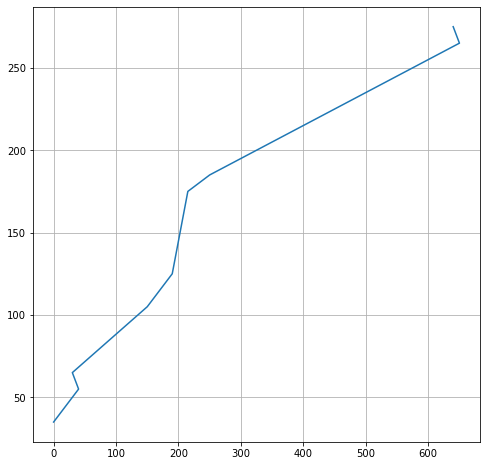

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

fig = plt.figure(figsize=(8,8))
x = dfPT['Pinch']
y = dfPT['iT']

plt.plot(x, y)
plt.grid()
plt.savefig(svgfileName)
plt.savefig(pngfileName)
